In [39]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates

In [50]:
# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data.csv", sep=";")
EV = EV.iloc[:, :33]
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
#data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y', errors='coerce')
EV['Start date'] = pd.to_datetime(EV['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')
print("Data.csv antes:")
print(EV.head())


# Carregar os dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')

print("\nPLUS.csv antes:")
print(plus.head())

# Mesclar os dois DataFrames usando as colunas de data corretas
merged_data = pd.merge_asof(EV.sort_values('Start date'), plus.sort_values('Date'), left_on='Start date', right_on='Date', direction='nearest')

merged_data = merged_data.drop(columns=['Date'])

# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
print("\nData.csv após a mesclagem:")
print(merged_data.head())

Data.csv antes:
  Start date           Stop date Network          Fleet report_ev   Group  \
0 2023-05-31  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA  Others   
1 2023-05-31  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA  Others   
2 2023-05-30  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA  Others   
3 2023-05-26  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA  Others   
4 2023-05-24  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA  Others   

         User   Charging Station     City Duration (min)  ...  \
0  José Silva  CAP_SON_MAI_00010  Moreira        321,983  ...   
1  José Silva  CAP_SON_MAI_00010  Moreira            0,1  ...   
2  José Silva  CAP_SON_MAI_00004     Maia          237,1  ...   
3  José Silva  CAP_SON_MAI_00002     Maia          22,55  ...   
4  José Silva  CAP_SON_MAI_00002     Maia           35,3  ...   

  MOBIE TAR total (€) MOBIE CPO total (€)  MOBIE E-mobility support (€)  \
0                   -                   -              

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_7248\495607381.py:15: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_7248\495607381.py:15: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_7248\495607381.py:15: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_7248\495607381.py:15: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consist

In [58]:
# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data_merged.csv", sep=";")
EV2 = pd.read_csv("Data.csv", sep=";")

EV['Start date'] = EV2['Start date']

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Temp'] = EV['Temp'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Plus'] = EV['Plus'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Exibindo o DataFrame resultante
print(EV.head())
print(EV['Temp'])

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station  City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00004  Maia         224.517  ...   
1  Others  José Silva  CAP_SON_MAI_00002  Maia           6.167  ...   
2  Others  José Silva  CAP_SON_MAI_00002  Maia          43.467  ...   
3  Others  José Silva  CAP_SON_MAI_00002  Maia          12.100  ...   
4  Others  José Silva  CAP_SON_MAI_00002     -           0.033  ...   

   VAT rate (%) Cost incl. IVA         Status   Temp Plus Period of Day  \
0            23           5,5

In [52]:
# Aplicando one-hot encoding para as colunas categóricas
EV = pd.get_dummies(EV, columns=['Period of Day', 'Day of Week', 'Season', 'Período Escolar', 'Charging Station'], drop_first=True)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User  City  Duration (min)  Total Energy (kWh)  ...  \
0  Others  José Silva  Maia         224.517               40.19  ...   
1  Others  José Silva  Maia           6.167                3.48  ...   
2  Others  José Silva  Maia          43.467               41.18  ...   
3  Others  José Silva  Maia          12.100               14.34  ...   
4  Others  José Silva     -           0.033                0.00  ...   

  Day of Week_Tuesday  Day of Week_Wednesday Season_Outono Season_Primavera  \
0                  

In [56]:
# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station  City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00004  Maia         224.517  ...   
1  Others  José Silva  CAP_SON_MAI_00002  Maia           6.167  ...   
2  Others  José Silva  CAP_SON_MAI_00002  Maia          43.467  ...   
3  Others  José Silva  CAP_SON_MAI_00002  Maia          12.100  ...   
4  Others  José Silva  CAP_SON_MAI_00002     -           0.033  ...   

   VAT rate (%) Cost incl. IVA         Status   Temp Plus Period of Day  \
0            23           5,5

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import threadpoolctl


threadpoolctl.threadpool_limits(1)


# Selecione as variáveis para o modelo K-Means (por exemplo, 'Duration (min)' e 'Total Energy (kWh)')
X = EV[['Duration (min)', 'Total Energy (kWh)', 'Temp', 'Plus', 'Month']]
X.info()
#X = EV[['Duration (min)', 'Total Energy (kWh)']]


# Padronize as variáveis (importante para o K-Means)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Execute o K-Means para diferentes números de clusters e armazene a inércia
inertia = []
for i in range(1, 11):  # Tente diferentes números de clusters de 1 a 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plote a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Carregar e pré-processar seus dados

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Separar features e targets
#features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
#targets = EV[['Total Energy (kWh)', 'Duration (min)', 'Period of Day']]"

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Normalizar os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Criar o modelo GradientBoostingRegressor multioutput
model = MultiOutputRegressor(GradientBoostingRegressor())

# Treinar o modelo
model.fit(X_train_scaled, y_train_scaled)

# Fazer previsões para o conjunto de teste
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizar as previsões
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'  Mean Squared Error: {mse}')
print(f'  Root Mean Squared Error: {rmse}')
print(f'  R-squared score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
#print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)', 'Duration (min)', 'Period of Day']))
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

  Mean Squared Error: 111.14824522171769
  Root Mean Squared Error: 10.542686812275024
  R-squared score: 0.9205882215051414

Previsões:


ValueError: Shape of passed values is (24, 3), indices imply (24, 1)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Carregar e pré-processar seus dados
# (Certifique-se de que EV, suas features, e targets estão definidos)

# Separar features e targets
features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
targets = EV[['Total Energy (kWh)', 'Duration (min)', 'Period of Day']]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Normalizar os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Criar o modelo GradientBoostingRegressor multioutput
model = MultiOutputRegressor(GradientBoostingRegressor())

# Treinar o modelo
model.fit(X_train_scaled, y_train_scaled)

# Criar dados para a próxima semana
next_week_data = pd.DataFrame({
    'Temp': [12, 13, 14, 15, 16, 17, 18],
    'Plus': [0, 0, 0, 0, 0, 0, 0],
    'Day of Week': [1, 2, 3, 4, 5, 6, 7],
    'Season': [3, 3, 3, 3, 3, 3, 3],
    'Período Escolar': [2, 2, 2, 2, 2, 2, 2]
})

# Normalizar os dados da próxima semana
next_week_data_scaled = scaler_X.transform(next_week_data)

# Fazer previsões para a próxima semana
next_week_prediction_scaled = model.predict(next_week_data_scaled)

# Desnormalizar as previsões
next_week_prediction = scaler_y.inverse_transform(next_week_prediction_scaled)

# Remover outliers e entradas com duração inferior a 5 minutos do y_test
y_test_cleaned = y_test[(y_test['Duration (min)'] >= 5) & (y_test['Total Energy (kWh)'] > 0)]

# Aplicar condições ao next_week_prediction
next_week_prediction_modified = next_week_prediction.copy()
next_week_prediction_modified[:, 1] = np.maximum(next_week_prediction_modified[:, 1], 5)
next_week_prediction_modified[:, 2] = np.where(next_week_prediction_modified[:, 2] < 1.5, 1, 2)


y_test_daily = y_test_cleaned.head(7)
next_week_prediction_modified2 = next_week_prediction_modified[:7, :]

# Calcular métricas com os conjuntos modificados
mse = mean_squared_error(y_test_daily, next_week_prediction_modified2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_daily, next_week_prediction_modified2)

# Imprimir métricas
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared score: {r2}")
print()

# Imprimir as previsões para cada dia da próxima semana
for i, day in enumerate(['Total Energy (kWh)', 'Duration (min)', 'Period of Day']):
    print(f'Previsão para {day} na próxima semana:')
    for j, prediction in enumerate(next_week_prediction[:, i]):
        print(f'  Valor previsto para {j+1}º dia: {prediction}')
    print()

Mean Squared Error: 14187.797379523807
Root Mean Squared Error: 119.11254081549855
R-squared score: -0.635673958980447

Previsão para Total Energy (kWh) na próxima semana:
  Valor previsto para 1º dia: 10.355138215701423
  Valor previsto para 2º dia: 26.89904913357771
  Valor previsto para 3º dia: 23.054905960057635
  Valor previsto para 4º dia: 34.886655404519736
  Valor previsto para 5º dia: 35.37431805767156
  Valor previsto para 6º dia: 40.82831775209783
  Valor previsto para 7º dia: 4.917714314544806

Previsão para Duration (min) na próxima semana:
  Valor previsto para 1º dia: 4.1744075486975305
  Valor previsto para 2º dia: 186.43516449184426
  Valor previsto para 3º dia: 170.46613587353175
  Valor previsto para 4º dia: 213.39885984733453
  Valor previsto para 5º dia: 254.6383885239095
  Valor previsto para 6º dia: 263.1476542040658
  Valor previsto para 7º dia: 178.78176565312603

Previsão para Period of Day na próxima semana:
  Valor previsto para 1º dia: 1.2570221230753322
  

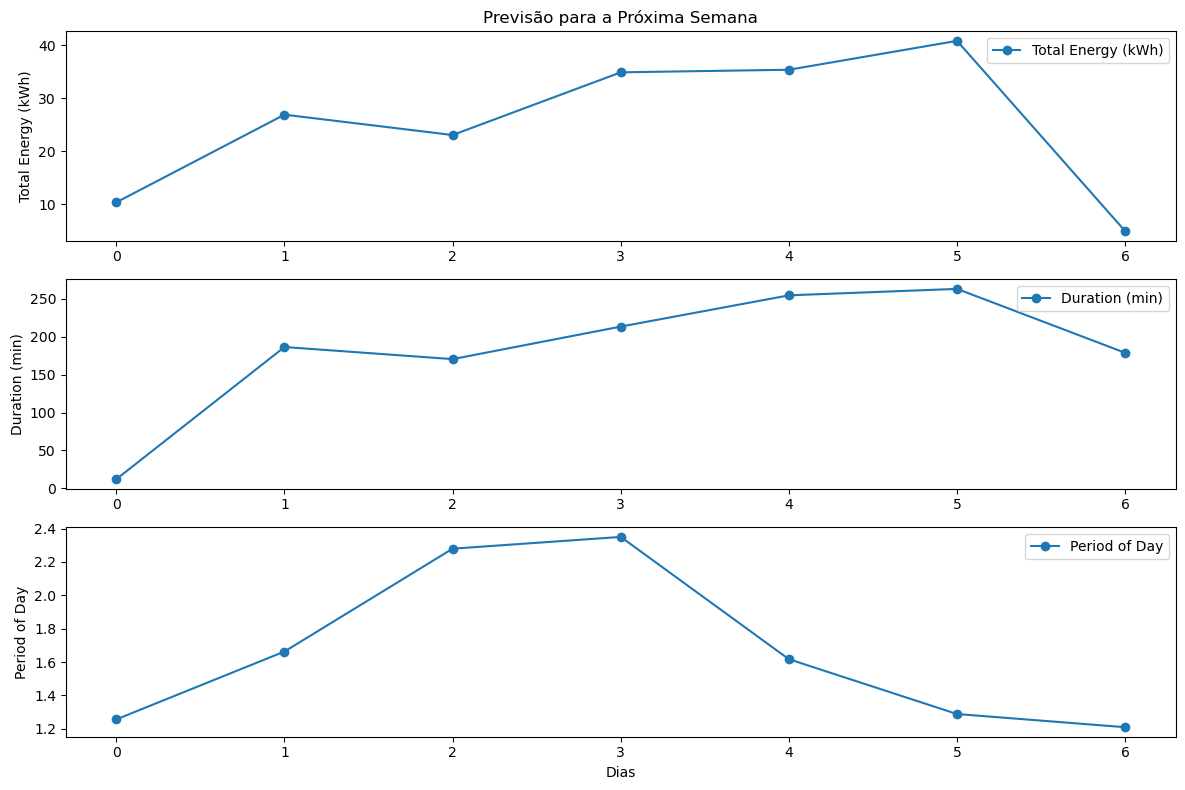

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Criar um array para os índices dos dias
days = np.arange(len(next_week_prediction))

# Plotar os valores previstos para cada variável
plt.figure(figsize=(12, 8))

# Plotar Total Energy (kWh)
plt.subplot(3, 1, 1)
plt.plot(days, next_week_prediction[:, 0], label='Total Energy (kWh)', marker='o')
plt.ylabel('Total Energy (kWh)')
plt.title('Previsão para a Próxima Semana')
plt.legend()

# Plotar Duration (min)
plt.subplot(3, 1, 2)
plt.plot(days, next_week_prediction[:, 1], label='Duration (min)', marker='o')
plt.ylabel('Duration (min)')
plt.legend()

# Plotar Period of Day
plt.subplot(3, 1, 3)
plt.plot(days, next_week_prediction[:, 2], label='Period of Day', marker='o')
plt.xlabel('Dias')
plt.ylabel('Period of Day')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Carregar e pré-processar dados

# Separar features e targets
features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
targets = EV[['Total Energy (kWh)', 'Duration (min)', 'Period of Day']]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Normalizar os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# Definir e treinar o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(targets.shape[1])  # número de saídas é igual ao número de variáveis de destino
])

model.compile(optimizer='adam', loss='mse')  # para regressão, usa-se erro quadrático médio (mse)

model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

next_week_data = pd.DataFrame({
    'Temp': [12,13,14,15,16,17,18],
    'Plus': [0,0,0,0,0,0,0],
    'Day of Week': [1,2,3,4,5,6,7],
    'Season': [3,3,3,3,3,3,3],
    'Período Escolar': [2,2,2,2,2,2,2]
})

# Fazer previsões
next_week_data_scaled = scaler_X.transform(next_week_data)
next_week_prediction_scaled = model.predict(next_week_data_scaled)

# Desnormalizar as previsões
next_week_prediction = scaler_y.inverse_transform(next_week_prediction_scaled)

# Remover outliers e entradas com duração inferior a 5 minutos do y_test
y_test_cleaned = y_test[(y_test['Duration (min)'] >= 5) & (y_test['Total Energy (kWh)'] > 0)]

# Aplicar condições ao next_week_prediction
next_week_prediction_modified = next_week_prediction.copy()
next_week_prediction_modified[:, 1] = np.maximum(next_week_prediction_modified[:, 1], 5)
next_week_prediction_modified[:, 2] = np.where(next_week_prediction_modified[:, 2] < 1.5, 1, 2)

y_test_daily = y_test_cleaned.head(7)
next_week_prediction_modified2 = next_week_prediction_modified[:7, :]

# Calcular métricas com os conjuntos modificados
mse = mean_squared_error(y_test_daily, next_week_prediction_modified2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_daily, next_week_prediction_modified2)

# Imprimir métricas
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared score: {r2}")
print()

# Imprimir as previsões para cada dia
for i, day in enumerate(['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']):
    print(f'Previsão para {day}:')
    print(f'  Energia: {next_week_prediction_modified2[i, 0]} kWh')
    print(f'  Duração: {next_week_prediction_modified2[i, 1]} minutos')
    print(f'  Period of Day: {next_week_prediction_modified2[i, 2]}')
    print()


Epoch 1/100
3/3 [==============================] - 0s 58ms/step - loss: 1.0223 - val_loss: 1.4309
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9991 - val_loss: 1.4271
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9854 - val_loss: 1.4308
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9736 - val_loss: 1.4349
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.9614 - val_loss: 1.4375
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9534 - val_loss: 1.4400
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9458 - val_loss: 1.4434
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9370 - val_loss: 1.4465
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9318 - val_loss: 1.4491
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.9255 - val_loss: 1.4532
Epoch 11/100
3/3 [=

Epoch 84/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7154 - val_loss: 1.5255
Epoch 85/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7129 - val_loss: 1.5174
Epoch 86/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7105 - val_loss: 1.5163
Epoch 87/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7100 - val_loss: 1.5225
Epoch 88/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7065 - val_loss: 1.5268
Epoch 89/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7035 - val_loss: 1.5274
Epoch 90/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7022 - val_loss: 1.5299
Epoch 91/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7015 - val_loss: 1.5331
Epoch 92/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6982 - val_loss: 1.5323
Epoch 93/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6955 - val_loss: 1.5340
Epoch 94/1

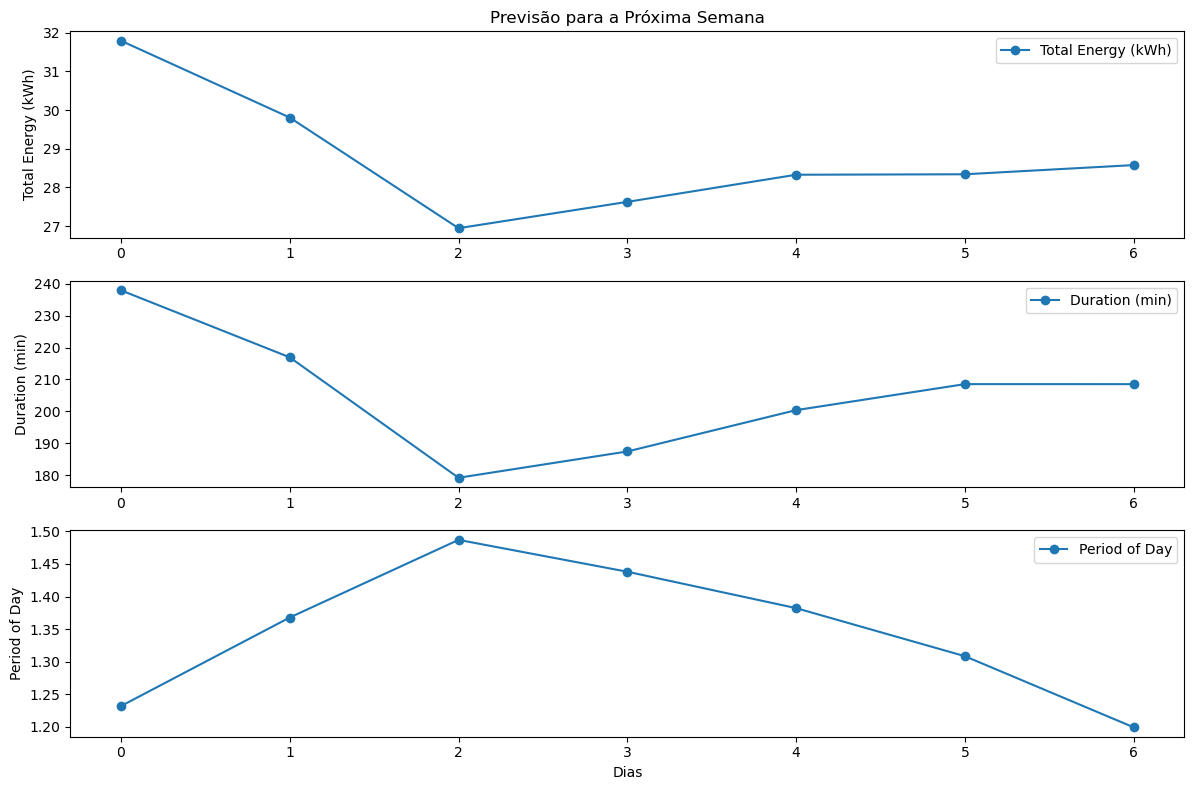

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Criar um array para os índices dos dias
days = np.arange(len(next_week_prediction))

# Plotar os valores previstos para cada variável
plt.figure(figsize=(12, 8))

# Plotar Total Energy (kWh)
plt.subplot(3, 1, 1)
plt.plot(days, next_week_prediction[:, 0], label='Total Energy (kWh)', marker='o')
plt.ylabel('Total Energy (kWh)')
plt.title('Previsão para a Próxima Semana')
plt.legend()

# Plotar Duration (min)
plt.subplot(3, 1, 2)
plt.plot(days, next_week_prediction[:, 1], label='Duration (min)', marker='o')
plt.ylabel('Duration (min)')
plt.legend()

# Plotar Period of Day
plt.subplot(3, 1, 3)
plt.plot(days, next_week_prediction[:, 2], label='Period of Day', marker='o')
plt.xlabel('Dias')
plt.ylabel('Period of Day')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
#features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
#target = EV['Total Energy (kWh)']

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(y_train)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

KeyError: "['Period of Day', 'Day of Week', 'Season', 'Período Escolar'] not in index"

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizando os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))  # ajuste para um único output
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Inicializando o modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # saída única para 'Total Energy (kWh)'
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')  # usando erro quadrático médio (mse)

# Treinando o modelo
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=2, validation_split=0.2)

# Fazendo previsões no conjunto de teste
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizando as previsões
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 1.1202 - val_loss: 0.8086
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.8309 - val_loss: 0.8514
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6990 - val_loss: 1.0708
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6047 - val_loss: 1.0787
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 1.0432
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5263 - val_loss: 1.0982
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5019 - val_loss: 1.0770
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4781 - val_loss: 1.1517
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4661 - val_loss: 1.1058
Epoch 10/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4460 - val_loss: 1.0376
Epoch 11/

37/37 [==============================] - 0s 3ms/step - loss: 0.0781 - val_loss: 1.9664
Epoch 84/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 2.1595
Epoch 85/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0758 - val_loss: 2.0018
Epoch 86/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0708 - val_loss: 2.0529
Epoch 87/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0806 - val_loss: 2.1841
Epoch 88/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0752 - val_loss: 2.1370
Epoch 89/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0691 - val_loss: 2.1332
Epoch 90/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0737 - val_loss: 1.9115
Epoch 91/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0639 - val_loss: 2.1737
Epoch 92/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0660 - val_loss: 1.9522
Epoch 93/100


In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializando o modelo XGBoost Regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r_squared = model.score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r_squared}')


Mean Squared Error: 133.63780925843594


ValueError: feature_names mismatch: ['Temp', 'Plus', 'Duration (min)', 'Day of Week', 'Season', 'Período Escolar'] ['Total Energy (kWh)']
expected Temp, Day of Week, Plus, Período Escolar, Duration (min), Season in input data
training data did not have the following fields: Total Energy (kWh)